In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv("train.csv/train.csv")
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
35286,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


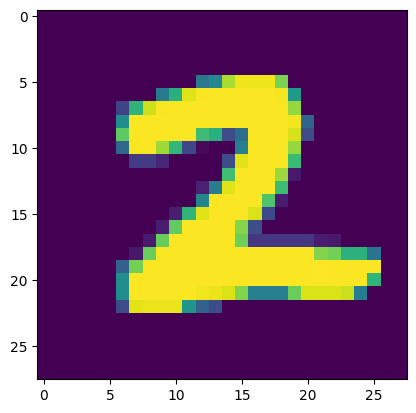

In [42]:
plt.imshow(df.iloc[30422,1:].values.reshape(28,28))

In [43]:
df.shape

(42000, 785)

In [44]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.2,random_state = 0)

In [46]:
X_train.shape

(8400, 784)

In [47]:
# check the Model Accuracy without Pca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn  = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test,y_pred)


0.9453869047619048

In [48]:
#Now Pca 
# step - 1 Mean Center the Data 
from sklearn.preprocessing import StandardScaler
scale  = StandardScaler(with_mean=True)

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)




In [49]:
# for i in range(1,100):
#     from sklearn.decomposition import PCA
#     pca = PCA(n_components=i)

#     X_train_trf = pca.fit_transform(X_train)

#     X_test_trf = pca.transform(X_test)
#     from sklearn.neighbors import KNeighborsClassifier

#     knn = KNeighborsClassifier()

#     knn.fit(X_train_trf,y_train)

#     y_pred_trf = knn.predict(X_test_trf)

#     from sklearn.metrics import accuracy_score

    # print(accuracy_score(y_test,y_pred_trf),i)

In [50]:
from sklearn.decomposition import PCA
pca  = PCA()
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)



pca.components_


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], shape=(784, 784))

In [51]:
pca.explained_variance_[0]

np.float64(40.66631120263737)

In [52]:
np.cumsum(pca.explained_variance_ratio_*100)

array([  6.04182318,  10.36237694,  14.32542155,  17.41857142,
        20.06765228,  22.42825704,  24.52410665,  26.37516644,
        28.06970186,  29.58076273,  31.03254103,  32.33434802,
        33.56205155,  34.75818681,  35.90056655,  37.01854758,
        38.04761931,  39.05050064,  40.04504888,  41.0156146 ,
        41.97626588,  42.85653568,  43.68997398,  44.49833306,
        45.2993202 ,  46.07221465,  46.833404  ,  47.58130871,
        48.31946758,  49.0153276 ,  49.68953687,  50.34147201,
        50.98549718,  51.60937241,  52.22073216,  52.81613724,
        53.39875851,  53.96694917,  54.52048718,  55.05930211,
        55.58245214,  56.10091523,  56.61261507,  57.11969863,
        57.60544983,  58.08714461,  58.55926928,  59.02625612,
        59.48919987,  59.94564125,  60.39980624,  60.84560086,
        61.28398075,  61.71185044,  62.13126558,  62.5464831 ,
        62.94705414,  63.3438672 ,  63.73389841,  64.11639193,
        64.48966549,  64.85784138,  65.2246495 ,  65.58

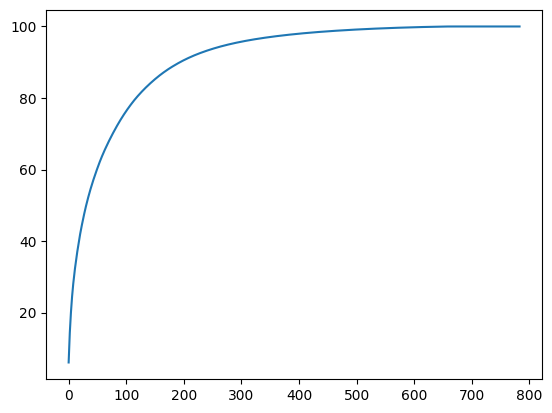

In [53]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

In [63]:
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.33729166666666666

In [64]:
import plotly.express as px
px.scatter(x=X_train_trf[:,0],y=X_train_trf[:,1],color=y_train)

In [69]:
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.5109821428571428

In [75]:
y_train = y_train.astype('str')
import plotly.io as pio
pio.renderers.default = 'browser'
fig = px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()